# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import openweather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#Open weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = [] 
lat_list = [] 
Lng_list = [] 
Temp_list = [] 
Wind_list = []
i=1

# Build query URL and request your results in Celsius
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    print(f'Processing Record {i}| {city}')
    query_url = f"{url}appid={openweather_key}&q={city}&units={units}"
    i = i +1
    # Get weather data
    weather_json = requests.get(query_url).json()
    try:
        city_list.append(weather_json['name'])
        cloudiness_list.append(weather_json['clouds']['all'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        humidity_list.append(weather_json['main']['humidity'])
        lat_list.append(weather_json['coord']['lat'])
        Lng_list.append(weather_json['coord']['lon'])
        Temp_list.append(weather_json['main']['temp_max'])
        Wind_list.append(weather_json['wind']['speed'])
        time.sleep(1)
    # Handle exceptions for a city thats not found
    except:
        # Append null values
        print(f"{city} not found. Skipping...")
        pass    
    
#query_url = f"{url}appid={openweather_key}&q=halifax&units={units}"
#weather_json = requests.get(query_url).json()
#print(json.dumps(weather_json, indent=4, sort_keys=True)) 

Beginning Data Retrieval
-----------------------------
Processing Record 1| hermanus
Processing Record 2| alyangula
Processing Record 3| belushya guba
belushya guba not found. Skipping...
Processing Record 4| ribeira grande
Processing Record 5| cape town
Processing Record 6| barentsburg
barentsburg not found. Skipping...
Processing Record 7| port alfred
Processing Record 8| kaitangata
Processing Record 9| hobart
Processing Record 10| kodiak
Processing Record 11| kamaishi
Processing Record 12| bethel
Processing Record 13| punta arenas
Processing Record 14| saint-philippe
Processing Record 15| rikitea
Processing Record 16| mahadday weyne
mahadday weyne not found. Skipping...
Processing Record 17| vitim
Processing Record 18| bambous virieux
Processing Record 19| taolanaro
taolanaro not found. Skipping...
Processing Record 20| katangli
Processing Record 21| hilo
Processing Record 22| mataura
Processing Record 23| cabo san lucas
Processing Record 24| east london
Processing Record 25| albany

Processing Record 235| shimoda
Processing Record 236| ngukurr
ngukurr not found. Skipping...
Processing Record 237| wajir
Processing Record 238| varadero
Processing Record 239| kutum
Processing Record 240| pevek
Processing Record 241| huarmey
Processing Record 242| yellowknife
Processing Record 243| seydi
Processing Record 244| kokstad
Processing Record 245| puerto el triunfo
Processing Record 246| andenes
Processing Record 247| coari
Processing Record 248| deputatskiy
Processing Record 249| coihaique
Processing Record 250| san carlos de bariloche
Processing Record 251| lubbock
Processing Record 252| tabarqah
tabarqah not found. Skipping...
Processing Record 253| le mars
Processing Record 254| kawana waters
kawana waters not found. Skipping...
Processing Record 255| lagoa
Processing Record 256| brae
Processing Record 257| wajid
Processing Record 258| melbu
Processing Record 259| kalmunai
Processing Record 260| mabaruma
Processing Record 261| nuuk
Processing Record 262| kosino
Processin

Processing Record 468| kahului
Processing Record 469| northam
Processing Record 470| palmer
Processing Record 471| crevenicu
Processing Record 472| luanda
Processing Record 473| ponta do sol
Processing Record 474| formoso do araguaia
formoso do araguaia not found. Skipping...
Processing Record 475| kampong thum
Processing Record 476| baillif
Processing Record 477| tautira
Processing Record 478| homer
Processing Record 479| anloga
Processing Record 480| bitung
Processing Record 481| san lawrenz
Processing Record 482| asilah
Processing Record 483| grand baie
Processing Record 484| golden
Processing Record 485| gat
Processing Record 486| kushima
Processing Record 487| kuryk
Processing Record 488| pingliang
Processing Record 489| caravelas
Processing Record 490| ust-nera
Processing Record 491| dori
Processing Record 492| marzuq
Processing Record 493| sundargarh
Processing Record 494| shirokiy
Processing Record 495| eureka
Processing Record 496| icod de los vinos
Processing Record 497| pala

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {
    "city" : city_list,
    "cloudiness":cloudiness_list,
    "country":country_list,
    "date" :date_list,
    "humidity":humidity_list,
    "lat":lat_list,
    "Lng":Lng_list,
    "Temp":Temp_list,
    "Wind":Wind_list
}

city_df = pd.DataFrame(city_dict)
city_df.to_csv("cities.csv", encoding="utf-8", index=False) 

In [8]:
city_df 

,city,cloudiness,country,date,humidity,lat,Lng,Temp,Wind
0,Hermanus,100,ZA,1579264104,71,-34.42,19.23,77.00,13.00
1,Alyangula,99,AU,1579264105,66,-13.85,136.42,89.60,6.93
2,Ribeira Grande,40,PT,1579264106,87,38.52,-28.70,59.00,3.36
3,Cape Town,20,ZA,1579264058,61,-33.93,18.42,81.00,32.21
4,Port Alfred,82,ZA,1579264108,82,-33.59,26.89,82.00,5.99
...,...,...,...,...,...,...,...,...,...
566,Mezhdurechensk,100,RU,1579264727,92,53.69,88.06,18.72,12.15
567,Anajatuba,96,BR,1579264728,83,-3.26,-44.62,81.25,3.11
568,Oodweyne,0,SO,1579264729,25,9.41,45.06,77.83,14.12
569,Kawalu,84,ID,1579264730,87,-7.38,108.21,73.36,2.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

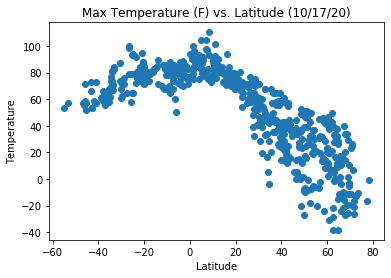

In [39]:
#Plot Temperature (F) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Temp'])
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title('Max Temperature (F) vs. Latitude (10/17/20)')
plt.savefig("TemperatureVsLatitude")
plt.show()

#### Latitude vs. Humidity Plot

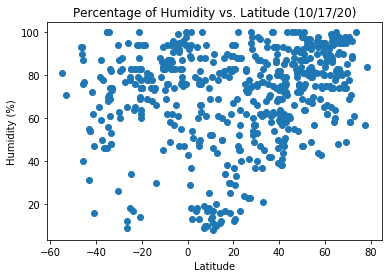

In [40]:
#Plot Humidity (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Percentage of Humidity vs. Latitude (10/17/20)')
plt.savefig("HumidityVsLatitude")
plt.show()

#### Latitude vs. Cloudiness Plot

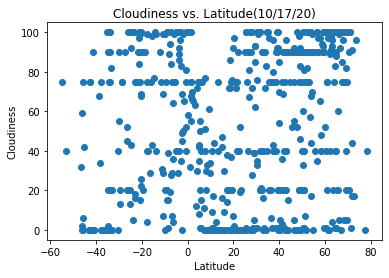

In [41]:
#Plot Cloudiness (%) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Cloudiness vs. Latitude(10/17/20)')
plt.savefig("CloudinessVsLatitude")
plt.show()

#### Latitude vs. Wind Speed Plot

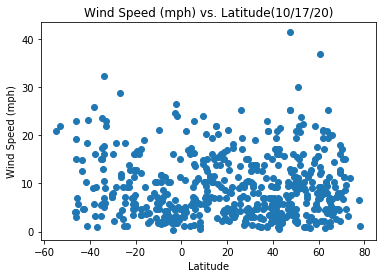

In [43]:
#Plot Wind Speed (mph) vs. Latitude on a scatter plot
plt.scatter(city_df['lat'],city_df['Wind'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Wind Speed (mph) vs. Latitude(10/17/20)')
plt.savefig("WindSpeedVsLatitude")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [45]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere_cities = city_df.loc[city_df['lat'] >= 0]
south_hemisphere_cities = city_df.loc[city_df['lat'] < 0]

,city,cloudiness,country,date,humidity,lat,Lng,Temp,Wind
0,Hermanus,100,ZA,1579264104,71,-34.42,19.23,77.00,13.00
1,Alyangula,99,AU,1579264105,66,-13.85,136.42,89.60,6.93
3,Cape Town,20,ZA,1579264058,61,-33.93,18.42,81.00,32.21
4,Port Alfred,82,ZA,1579264108,82,-33.59,26.89,82.00,5.99
5,Kaitangata,0,NZ,1579264109,90,-46.28,169.85,55.81,19.15
...,...,...,...,...,...,...,...,...,...
562,Walvis Bay,18,NA,1579264722,65,-22.96,14.51,77.00,10.29
563,Nangomba,69,TZ,1579264723,84,-10.90,38.50,82.63,4.59
564,Bendigo,0,AU,1579264724,46,-36.77,144.28,62.01,1.01
567,Anajatuba,96,BR,1579264728,83,-3.26,-44.62,81.25,3.11


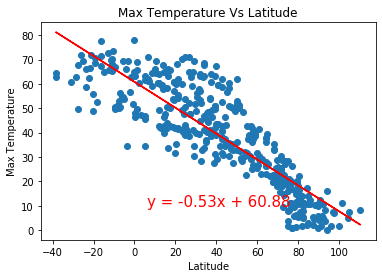

In [54]:
#Northern Hemisphere - Temperature (F) vs. Latitude
yaxis = north_hemisphere_cities['Temp']
xaxis = north_hemisphere_cities['lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(yaxis, xaxis)
regress_values = yaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(yaxis, lat)
plt.plot(yaxis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature Vs Latitude')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


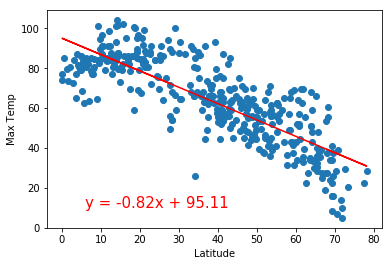

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


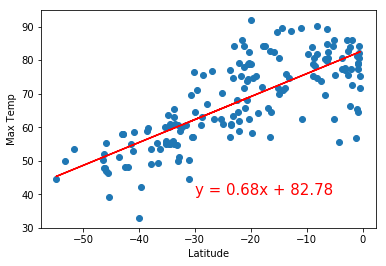

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


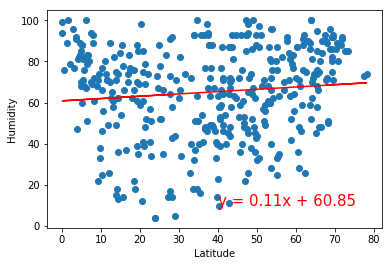

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


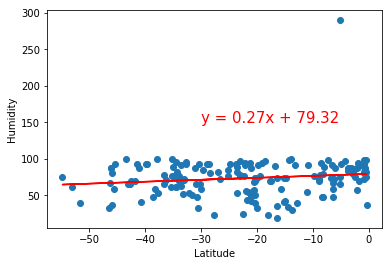

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


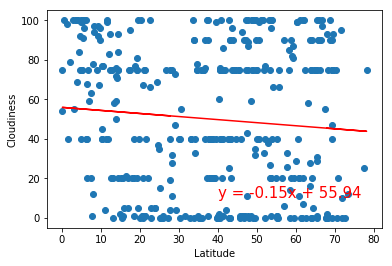

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


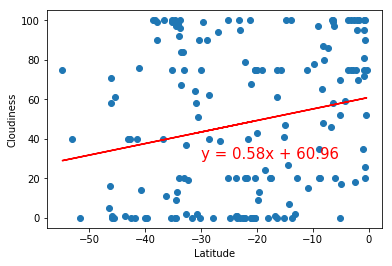

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


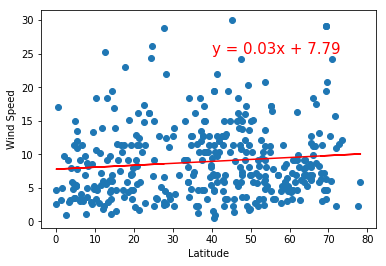

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


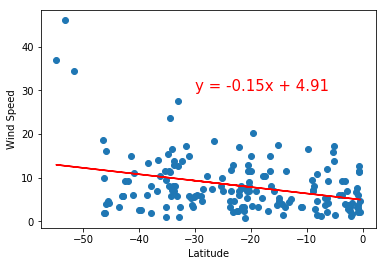